## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""

'\nYour code here (optional)\n確認硬體資源\n'

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x=x/255
    if flatten:
        x=x.reshape((len(x),-1))
    return x

def preproc_y(y,num_classes=10):
    if y.shape[-1]==1:
        y=keras.utils.to_categorical(y,num_classes)
    return y


In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


model=build_mlp(input_shape=x_train.shape[1:])
model.summary()

W0721 19:06:07.025515 4468286912 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0721 19:06:07.046832 4468286912 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0721 19:06:07.049528 4468286912 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0721 19:08:51.236829 4468286912 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0721 19:08:51.248745 4468286912 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0721 19:08:56.247134 4468286912 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0721 19:08:56.296556 4468286912 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 6s 117us/step - loss: 1.9099 - acc: 0.3105 - val_loss: 1.7527 - val_acc: 0.3713
Epoch 2/100
50000/50000 [==============================] - 6s 114us/step - loss: 1.6939 - acc: 0.3932 - val_loss: 1.6020 - val_acc: 0.4302
Epoch 3/100
50000/50000 [==============================] - 6s 111us/step - loss: 1.6034 - acc: 0.4271 - val_loss: 1.5731 - val_acc: 0.4367
Epoch 4/100
50000/50000 [==============================] - 6s 115us/step - loss: 1.5390 - acc: 0.4505 - val_loss: 1.5230 - val_acc: 0.4602
Epoch 5/100
50000/50000 [==============================] - 6s 114us/step - loss: 1.5055 - acc: 0.4615 - val_loss: 1.4858 - val_acc: 0.4728
Epoch 6/100
50000/50000 [==============================] - 6s 114us/step - loss: 1.4685 - acc: 0.4772 - val_loss: 1.5095 - val_acc: 0.4702
Epoch 7/100
50000/50000 [==============================] - 6s 116us/step - loss: 1.4218 - acc: 0.4932 - val_loss: 1.

50000/50000 [==============================] - 7s 144us/step - loss: 0.5252 - acc: 0.8093 - val_loss: 1.9794 - val_acc: 0.5172
Epoch 60/100
50000/50000 [==============================] - 7s 148us/step - loss: 0.5094 - acc: 0.8186 - val_loss: 2.0894 - val_acc: 0.5115
Epoch 61/100
50000/50000 [==============================] - 7s 144us/step - loss: 0.5089 - acc: 0.8176 - val_loss: 2.1204 - val_acc: 0.5014
Epoch 62/100
50000/50000 [==============================] - 6s 121us/step - loss: 0.4887 - acc: 0.8238 - val_loss: 2.1212 - val_acc: 0.5129
Epoch 63/100
50000/50000 [==============================] - 6s 124us/step - loss: 0.4724 - acc: 0.8313 - val_loss: 2.1602 - val_acc: 0.5081
Epoch 64/100
50000/50000 [==============================] - 6s 124us/step - loss: 0.4791 - acc: 0.8294 - val_loss: 2.2109 - val_acc: 0.5038
Epoch 65/100
50000/50000 [==============================] - 6s 122us/step - loss: 0.4750 - acc: 0.8301 - val_loss: 2.1896 - val_acc: 0.5082
Epoch 66/100
50000/50000 [=======

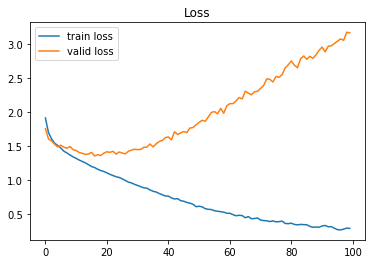

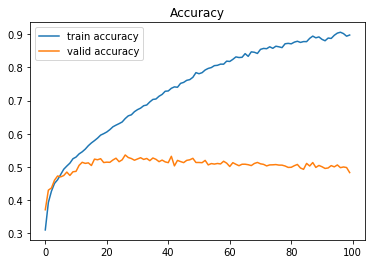

In [11]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()